# World Happiness Report Project

In [154]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import joblib


In [116]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


From the above data we observe:-   Most of the high-ranked countries are primarily in Western Europe and these countries have high happiness scores, generally above 7.0.
                                   Economic stability, social support, health, and freedom are critical factors contributing to a nation's happiness.
                                   In the above Report dataset, the target column is the Happiness Score, while the feature columns include Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Dystopia Residual.

In [101]:
df.head(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


# Exploratory Data Analysis(EDA)

In [10]:
#checking the dimension of the dataset

df.shape

(158, 12)

The dataset contains 158 rows and 12 columns.

In [11]:
#checking the null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing values in any of the columns of the dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

The dataset consists of 158 entries with 12 columns, including 2 object columns (Country, Region), 1 integer column (Happiness Rank), and 9 float columns (e.g., Happiness Score, Standard Error, Economy (GDP per Capita)), with no missing values and a memory usage of approximately 14.9 KB.

<Axes: >

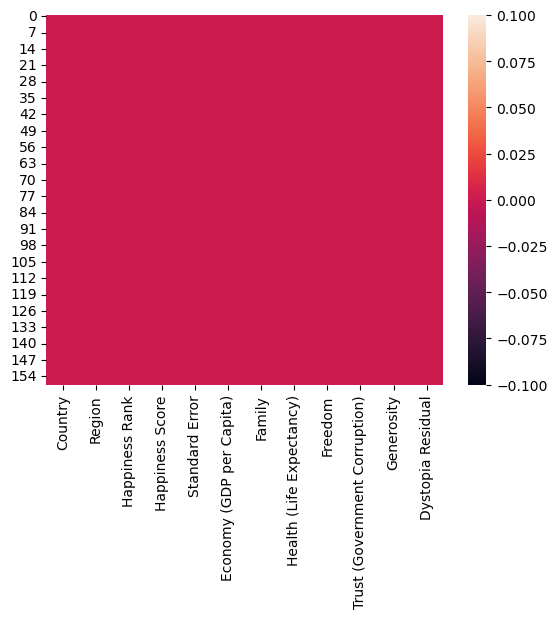

In [13]:
#lets visualise above data using heatmap
sns.heatmap(df.isnull())

# Description

In [14]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140



From the summary statistics of the dataset, we observe that the happiness scores of 158 countries have a mean of 5.38 with a standard deviation of 1.15. The GDP per Capita ranges from 0 to 1.69 with a mean of 0.85. Family, Life Expectancy, Freedom, Trust in Government, and Generosity have mean values of 0.99, 0.63, 0.43, 0.14, and 0.24 respectively. The Dystopia Residual ranges from 0.33 to 3.60 with a mean of 2.10, indicating the residual happiness score after accounting for the explained variables. There are no missing values in any of the columns.

# Visualization

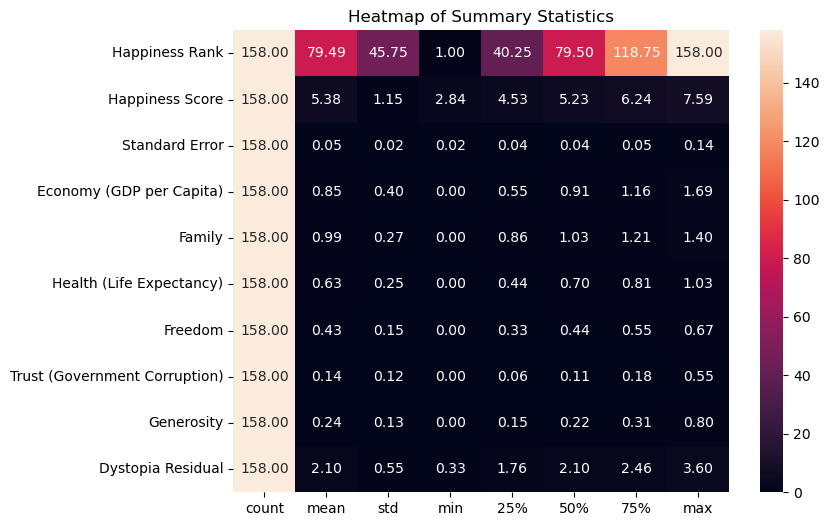

In [29]:
  #Heatmaps
summary = df.describe().transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(summary, annot=True, fmt='.2f')
plt.title('Heatmap of Summary Statistics')
plt.show()

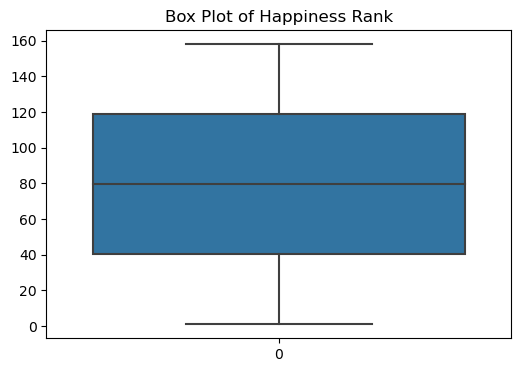

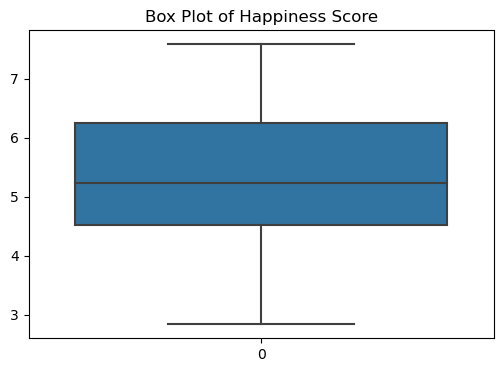

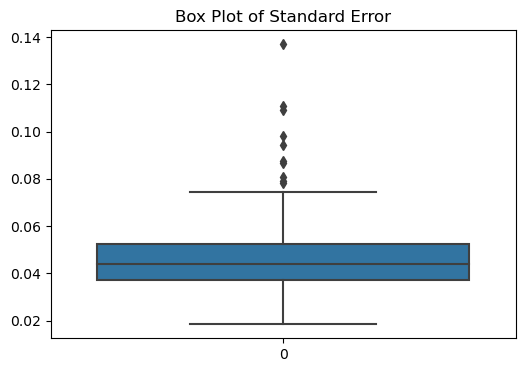

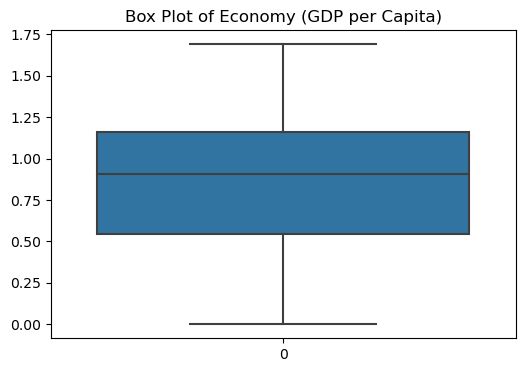

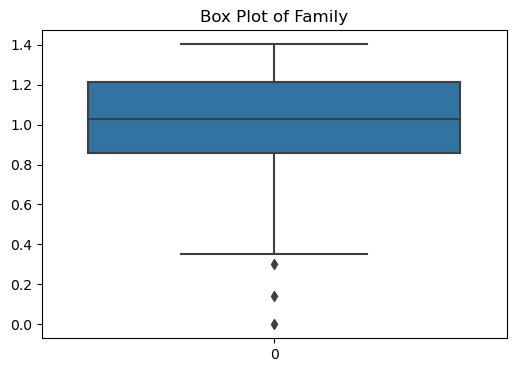

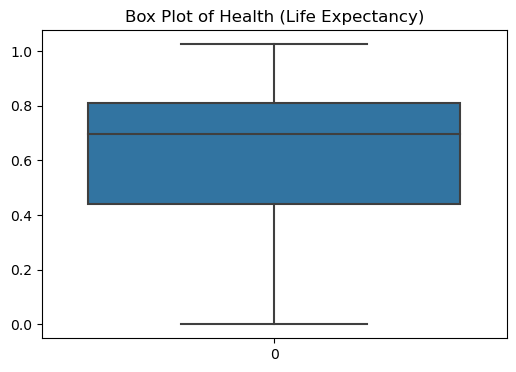

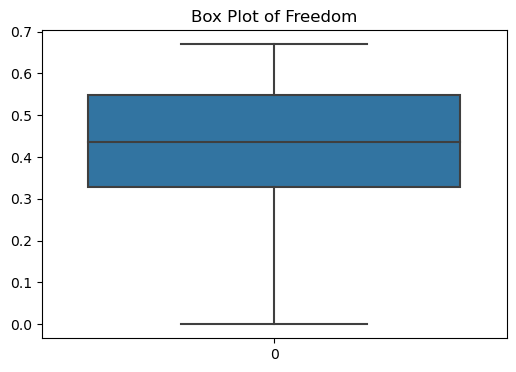

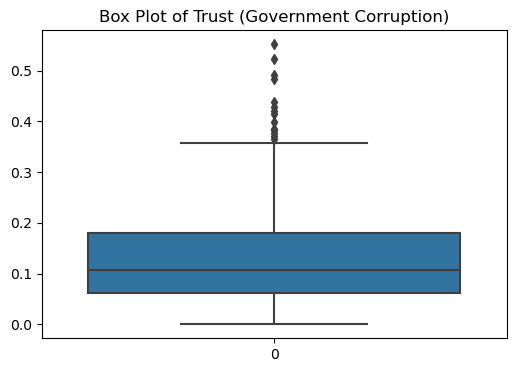

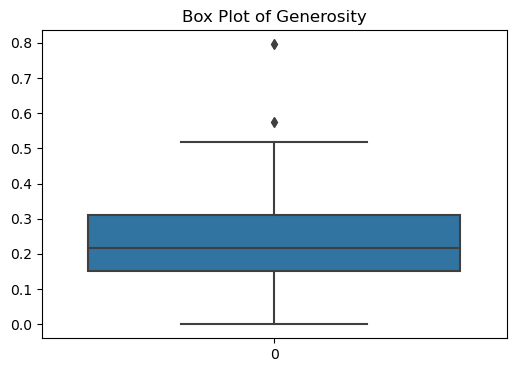

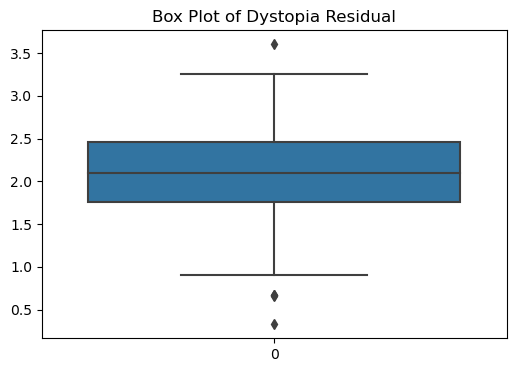

In [66]:
numerical_features = df.drop(['Country', 'Region'], axis=1)

for feature in numerical_features.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=numerical_features[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

The standard error has a relatively narrow IQR with several high outliers.

The economy (GDP per capita) has a wider IQR and no outliers.

The family variable has a narrow IQR with several low outliers.

Happiness Rank is widely distributed with no outliers.

Trust in government corruption varies a lot between countries, with some countries having unusually high or low levels of trust compared to others.

Generosity also has a few outliers, indicating that while most countries have similar levels of generosity, a few have much higher values.

In [23]:
skewness = df.drop(['Country', 'Region'], axis=1).skew()
print(skewness)

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64


The skewness values reveal that most numerical features in the dataset are skewed: Happiness Rank is nearly symmetrical, Happiness Score has mild positive skewness, Standard Error is highly positively skewed, while Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, and Dystopia Residual have negative skewness. Additionally, Trust (Government Corruption) and Generosity are positively skewed.

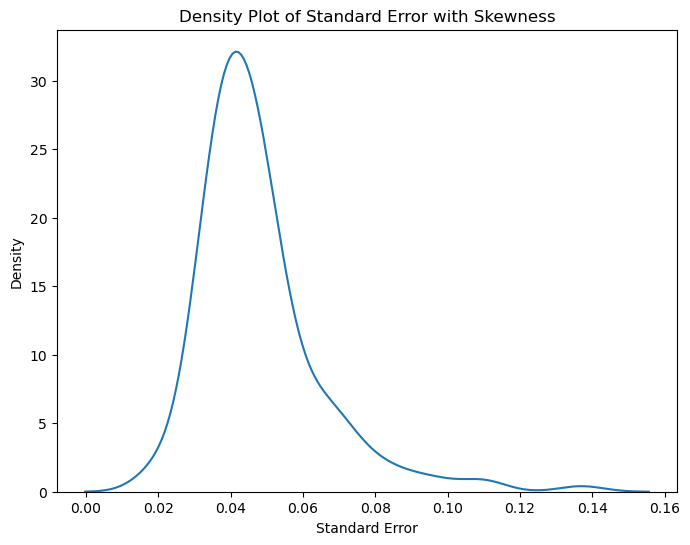

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Standard Error'])
plt.title('Density Plot of Standard Error with Skewness')
plt.show()

Standard Error (Skewness: 1.983439): This feature is highly positively skewed,  its distribution has a long tail on the right side

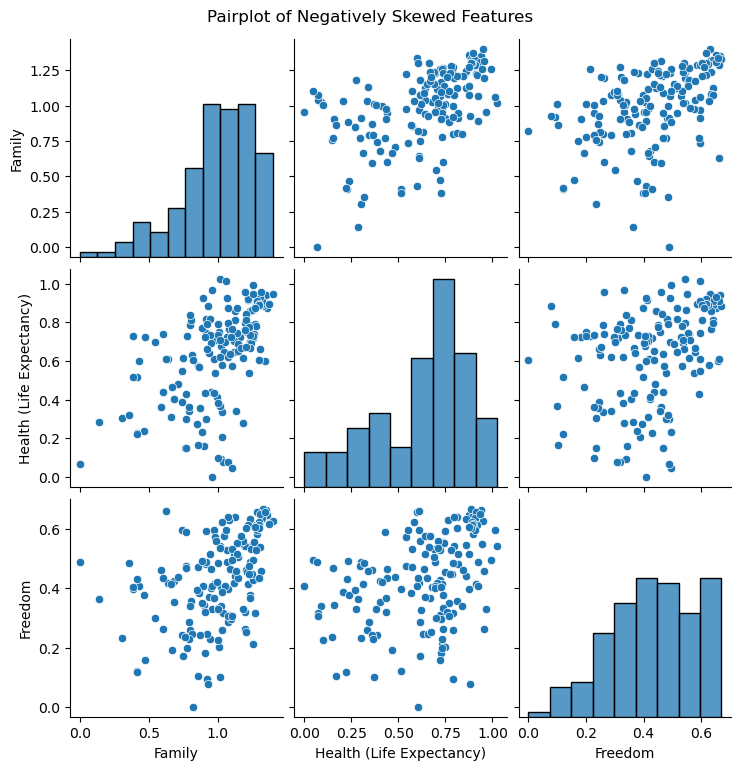

In [28]:
#Pairplot for negatively skewed features

negative_skew_features = ['Family', 'Health (Life Expectancy)', 'Freedom']


sns.pairplot(df[negative_skew_features])
plt.suptitle('Pairplot of Negatively Skewed Features', y=1.02)
plt.show()


pairplot shows the relationships between three features: Family, Health (Life Expectancy), and Freedom.

For Family, the distribution is left-skewed (negatively skewed), meaning most values are towards the higher end.
For Health (Life Expectancy), the distribution is also left-skewed.
For Freedom, the distribution is left-skewed as well.

Family vs. Health (Life Expectancy): There's a positive correlation, meaning as family values increase, health values tend to increase as well.
Family vs. Freedom: There's no clear correlation; the points are scattered randomly.
Health (Life Expectancy) vs. Freedom: There's no clear correlation; the points are scattered randomly.

The positive correlation between Family and Health (Life Expectancy) suggests that these two variables tend to increase together, while there doesn't seem to be a strong relationship between Family and Freedom or Health and Freedom.











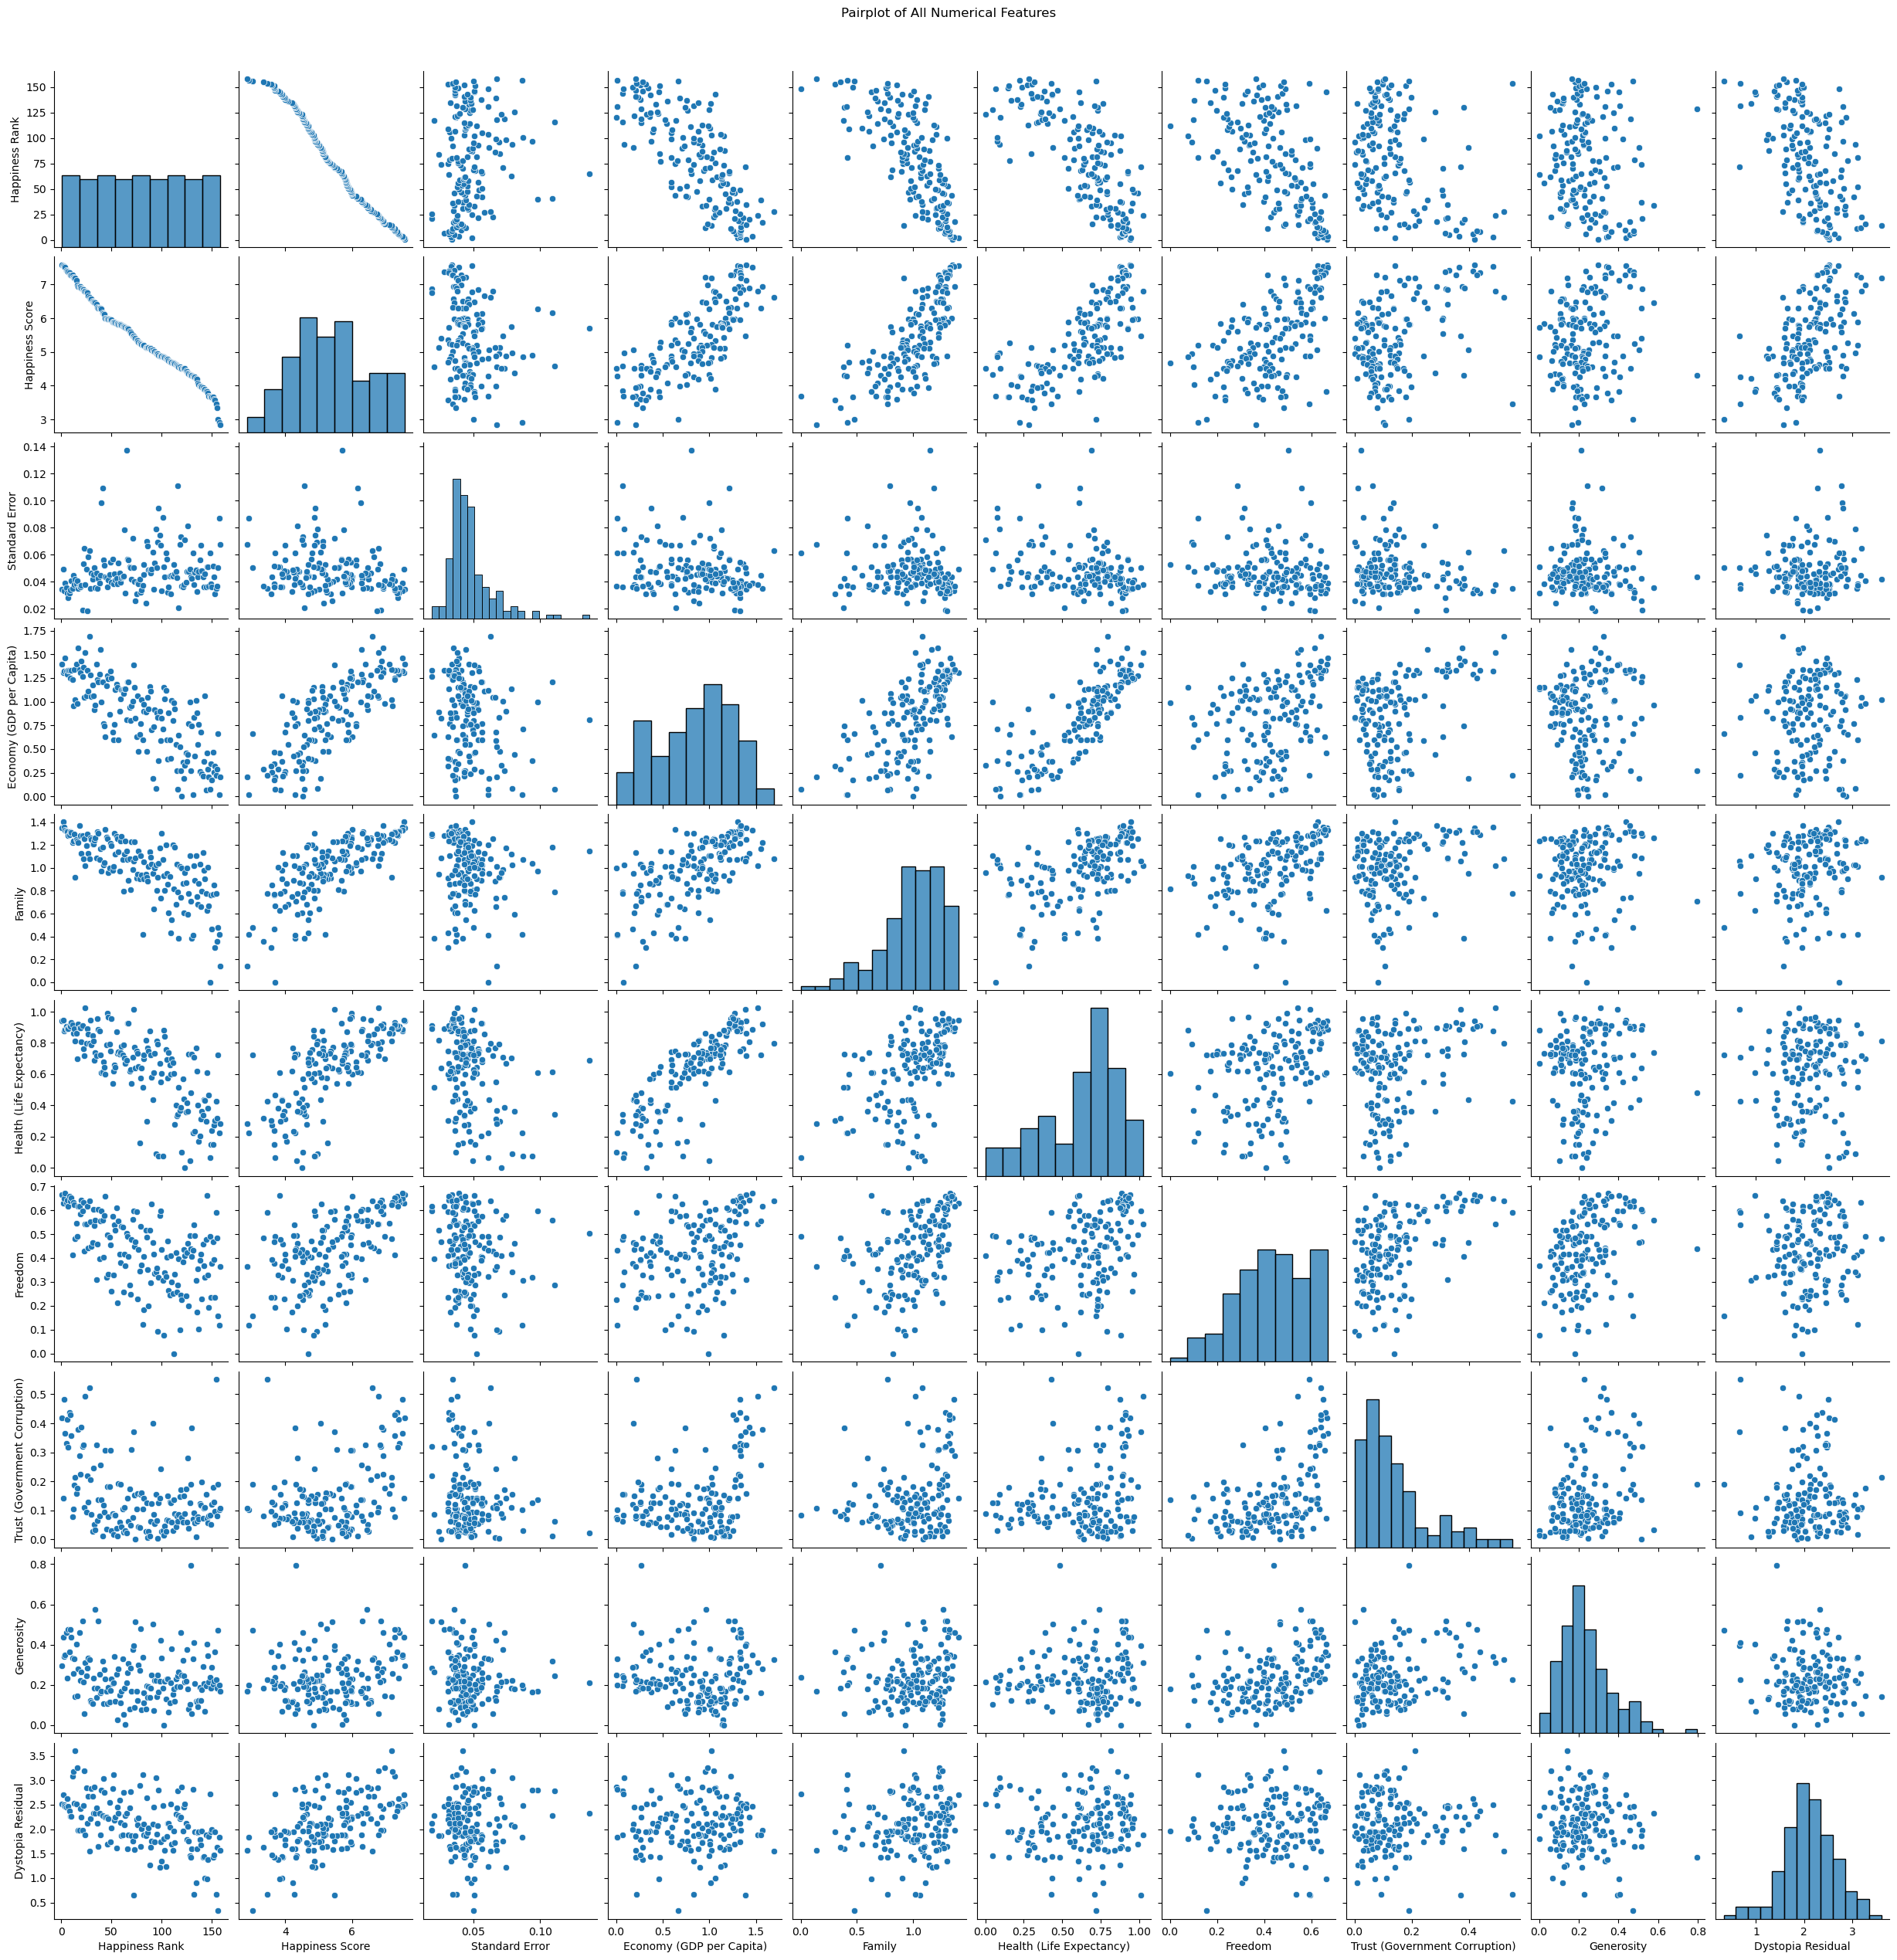

In [43]:
#Pairplot for All Features

sns.pairplot(df.drop(['Country', 'Region'], axis=1))
plt.suptitle('Pairplot of All Numerical Features', y=1.02)
plt.show()

we have already observed pairplot for negatively skewed features now here we can see representation of relationships and distributions among all numerical features.

# Correlation using a Heatmap

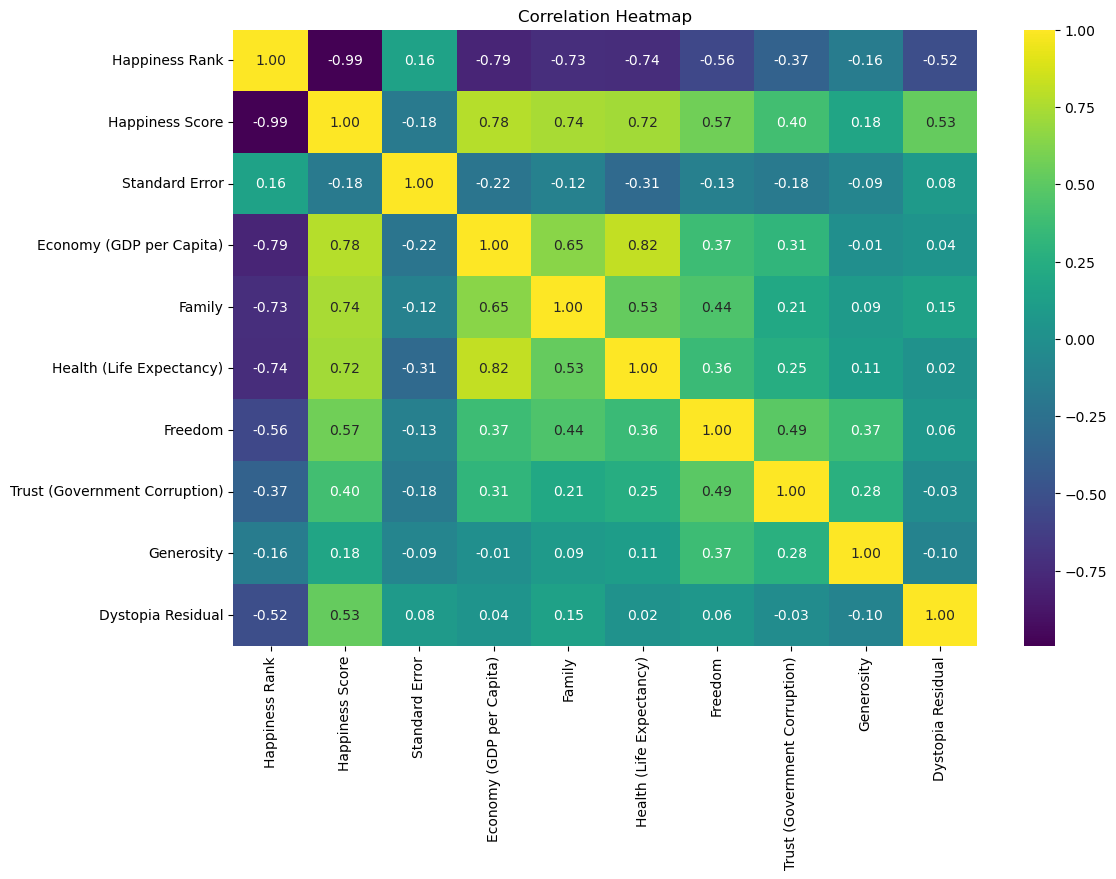

In [60]:
#Correlation Heatmap

plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(['Country', 'Region'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

There is a strong negative correlation between Happiness Rank and Happiness Score (-0.99).Higher happiness scores are associated with better (lower numerical) happiness ranks.

Economy (GDP per Capita) is strongly correlated with Happiness Score (0.78) and Health (Life Expectancy) (0.82), indicating wealthier countries tend to be happier and healthier.

Strong positive correlation with Happiness Score (0.72) and Economy (GDP per Capita) (0.82), showing that better health outcomes are linked to higher happiness and economic status.

Positive correlation with Happiness Score (0.74) and Economy (GDP per Capita) (0.65), suggesting that strong family connections and better economic conditions are related to higher happiness.

Positive correlation with Happiness Score (0.57), indicating that greater perceived freedom is associated with higher happiness.

Positive correlation with Happiness Score (0.40), showing that lower corruption levels are linked to higher happiness.

overall, economic prosperity, health, family support, freedom, and lower corruption levels are key contributors to higher happiness, with generosity also playing a smaller but positive role.

# Dropping column

In [102]:
X = df.drop(['Happiness Score', 'Country', 'Region'], axis=1)
y = df['Happiness Score']

# Splitting the Dataset

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialization

In [104]:
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# model training

In [105]:
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Make predictions

In [106]:
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate the model

In [107]:
lr_mse = mean_squared_error(y_test, lr_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

# print

In [108]:
print(f'Linear Regression Mean Squared Error: {lr_mse}')
print(f'Decision Tree Mean Squared Error: {dt_mse}')
print(f'Random Forest Mean Squared Error: {rf_mse}')

Linear Regression Mean Squared Error: 7.427424037449562e-08
Decision Tree Mean Squared Error: 0.002670781249999999
Random Forest Mean Squared Error: 0.0023392188718750614


linear regression is the best performer among the three, as indicated by its very low RMSE value. It suggests that linear relationships in the data are well-captured by this model.

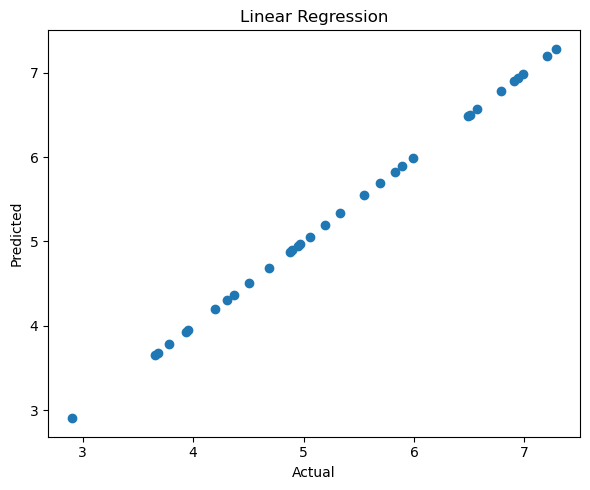

In [163]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.tight_layout()
plt.show()

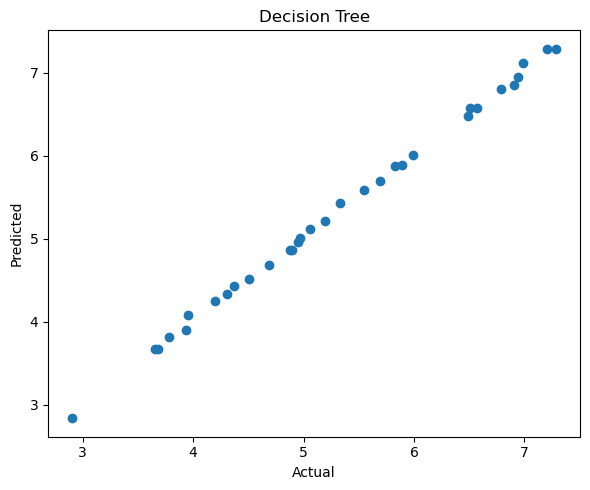

In [164]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, dt_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')
plt.tight_layout()
plt.show()

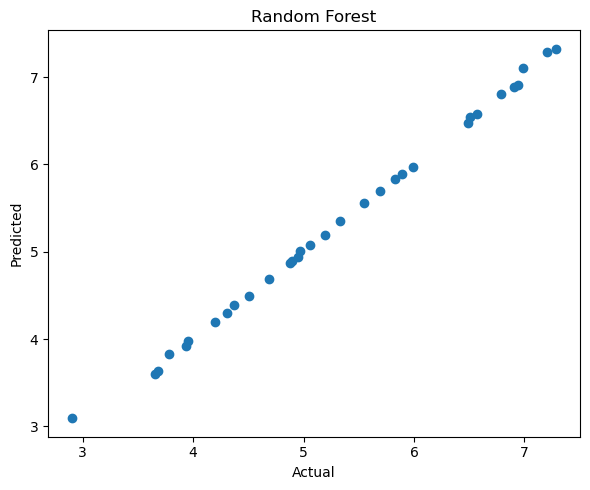

In [165]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')
plt.tight_layout()
plt.show()

# Linear Regression Cross-Validation

In [119]:
lr_scores = cross_val_score(lr_model, X, y, scoring='neg_mean_squared_error', cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)
print(f'Linear Regression Cross-Validated RMSE: {lr_rmse_scores.mean()}')


Linear Regression Cross-Validated RMSE: 0.0002912880430173375


An RMSE value of approximately 0.0003 is extremely low, suggesting that the Linear Regression model performs very well and makes highly accurate predictions.

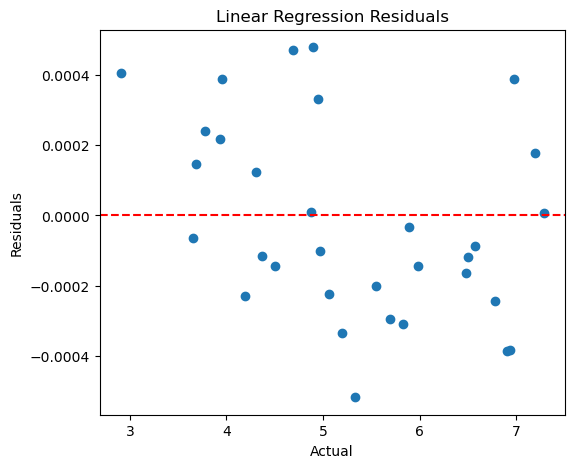

In [132]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test - lr_pred)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Decision Tree Cross-Validation

In [118]:
dt_scores = cross_val_score(dt_model, X, y, scoring='neg_mean_squared_error', cv=10)
dt_rmse_scores = np.sqrt(-dt_scores)
print(f'Decision Tree Cross-Validated RMSE: {dt_rmse_scores.mean()}')


Decision Tree Cross-Validated RMSE: 0.21279901537646312


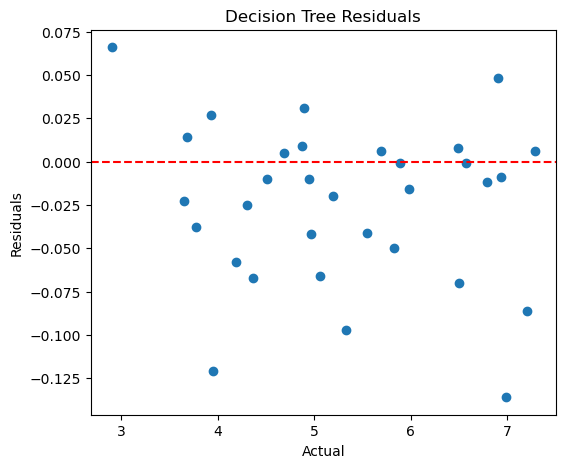

In [128]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test - dt_pred)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Decision Tree Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Random Forest Cross-Validation

In [120]:
rf_scores = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
print(f'Random Forest Cross-Validated RMSE: {rf_rmse_scores.mean()}')


Random Forest Cross-Validated RMSE: 0.2215507611770314


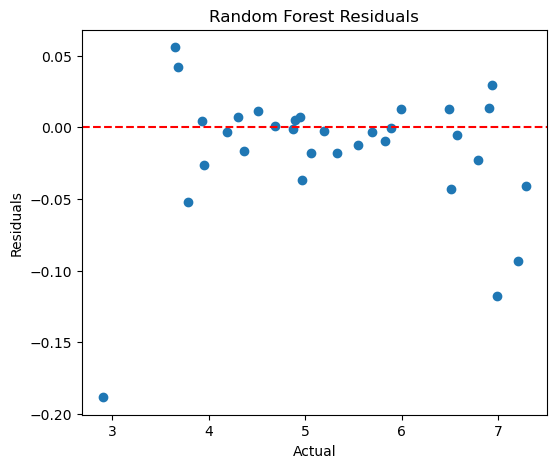

In [133]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test - rf_pred)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Decision Tree and Random Forest have higher RMSE values, which suggest that these models are less accurate in predicting happiness scores compared to Linear Regression for this dataset.Based on the RMSE values, Linear Regression is the most accurate model for predicting happiness scores in this dataset, So we proceed furthur with linear regression.

# coefficients of the linear regression model

In [135]:
coefficients = lr_model.coef_
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)


print(coef_df)


                         Feature  Coefficient
2       Economy (GDP per Capita)     0.999934
8              Dystopia Residual     0.999852
6  Trust (Government Corruption)     0.999836
3                         Family     0.999803
7                     Generosity     0.999737
4       Health (Life Expectancy)     0.999687
5                        Freedom     0.999643
0                 Happiness Rank    -0.000005
1                 Standard Error    -0.001038


Positive Coefficients: Indicate that as the value of the feature increases, the predicted happiness score also increases.

Negative Coefficients: Indicate that as the value of the feature increases, the predicted happiness score decreases.

Magnitude of Coefficients: Shows the strength of the relationship. Larger absolute values indicate a stronger relationship.

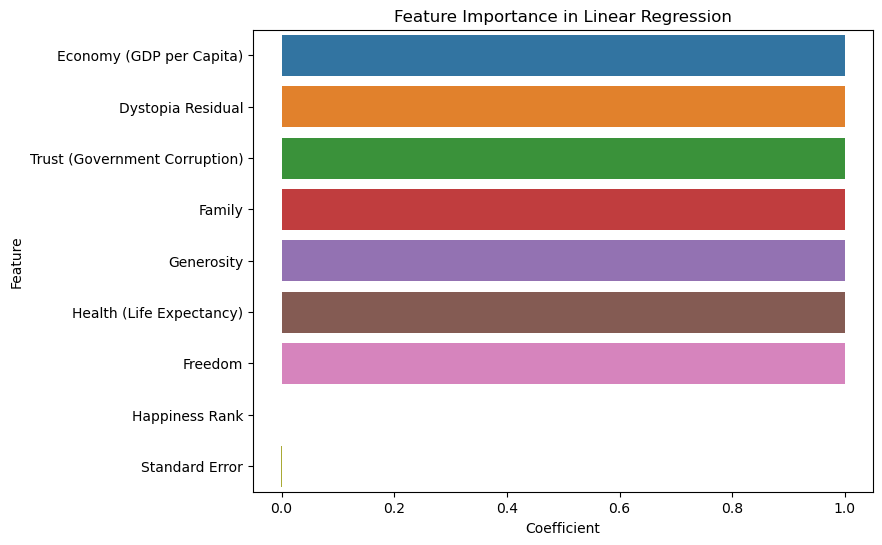

In [137]:
# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression')
plt.show()


This uniformity suggests that these features are equally important in determining the Happiness Score, while the Standard Error does not contribute much.

# Calculate residuals

In [141]:
residuals = y_test - lr_pred

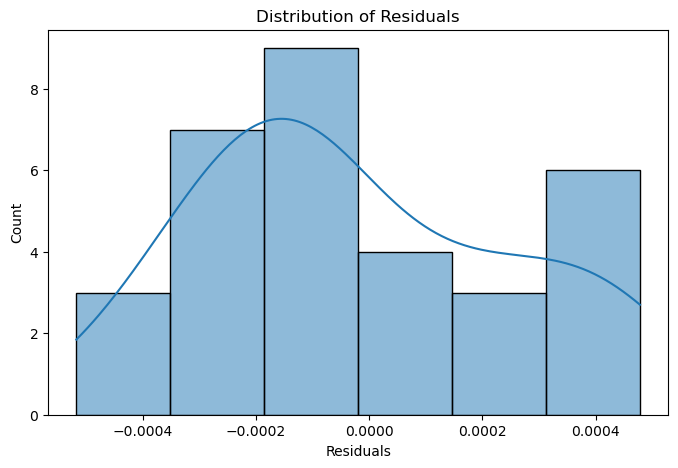

In [144]:
# Plot histogram of residuals

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


In [145]:
# Calculate R-squared and MAE
r2 = r2_score(y_test, lr_pred)
mae = mean_absolute_error(y_test, lr_pred)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


R-squared: 0.9999999476481373
Mean Absolute Error: 0.00023374650843088762


 The Linear Regression model demonstrates excellent performance with high accuracy in predicting happiness scores.

# Hyperparameter Tuning Using Ridge Regression

In [148]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_model = Ridge()
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)


Best Parameters: {'alpha': 0.1}
Best Score: 0.0015602524174109552


# Evaluate the Best Model

In [151]:
# Get the best model from GridSearchCV
best_ridge_model = grid_search.best_estimator_

ridge_pred = best_ridge_model.predict(X_test)

# Evaluate the best model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f'Ridge Regression Mean Squared Error: {ridge_mse}')
print(f'Ridge Regression Root Mean Squared Error: {ridge_rmse}')
print(f'Ridge Regression R-squared: {ridge_r2}')
print(f'Ridge Regression Mean Absolute Error: {ridge_mae}')


Ridge Regression Mean Squared Error: 0.001161727173384094
Ridge Regression Root Mean Squared Error: 0.03408411907889206
Ridge Regression R-squared: 0.9991811618509062
Ridge Regression Mean Absolute Error: 0.025107199291591983


The Ridge Regression model shows exceptional performance with very low MSE, RMSE, and MAE, indicating accurate predictions. The R-squared value is very high, suggesting that the model explains nearly all the variability in the target variable.

# Comparision of Metrics

In [153]:
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge Regression'],
    'MSE': [lr_mse, dt_mse, rf_mse, ridge_mse],
    'RMSE': [np.sqrt(lr_mse), np.sqrt(dt_mse), np.sqrt(rf_mse), np.sqrt(ridge_mse)],
    'R-squared': [r2_score(y_test, lr_pred), r2_score(y_test, dt_pred), r2_score(y_test, rf_pred), r2_score(y_test, ridge_pred)],
    'MAE': [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, dt_pred), mean_absolute_error(y_test, rf_pred), mae]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

print(metrics_df)


               Model           MSE      RMSE  R-squared       MAE
0  Linear Regression  7.427424e-08  0.000273   1.000000  0.000234
1      Decision Tree  2.670781e-03  0.051680   0.998118  0.038094
2      Random Forest  2.339219e-03  0.048365   0.998351  0.028702
3   Ridge Regression  1.161727e-03  0.034084   0.999181  0.000234


The Ridge Regression model shows excellent performance with very low values for MSE, RMSE, and MAE, and a very high R-squared value. This indicates that the model is making highly accurate predictions and explains almost all of the variance in the target variable.so we conclude from here that both linear regression and ridge regression suits best for this project.

# Final model

Linear Regression has the best overall performance in terms of MSE, RMSE, MAE, and R-squared. This indicates it is currently the best-performing model.

Ridge Regression also  performs very well but have slightly  higher MSE compared to Linear Regression and so we finalise linear regression as our final model

# saving the model

In [157]:
final_model = lr_model  
model_filename = 'final_linear_regression_model.pkl'
joblib.dump(final_model, model_filename) 

print(f"Final model saved to {model_filename}")

Final model saved to final_linear_regression_model.pkl


# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# Titanic survived Project

In [244]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [167]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


From the above data we see target variable "survived" has been mentioned as 0 & 1(0 = No, 1 = Yes). The feature variables used to predict this outcome are Pclass, Sex, Age, SibSp, Parch , Fare, and Embarked, we can see some missing values we will find out it lateron.

In [168]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis(EDA)

In [170]:
df.shape

(891, 12)

In [172]:
#checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset has missing values in the following columns: Age with 177 missing entries, Cabin with 687 missing entries, and Embarked with 2 missing entries. All other columns have no missing values.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset consists of 891 entries with 12 columns, including 3 columns with missing values: Age (177 missing), Cabin (687 missing), and Embarked (2 missing). The dataset includes both numerical and categorical data, with a total memory usage of approximately 83.7 KB.

<Axes: >

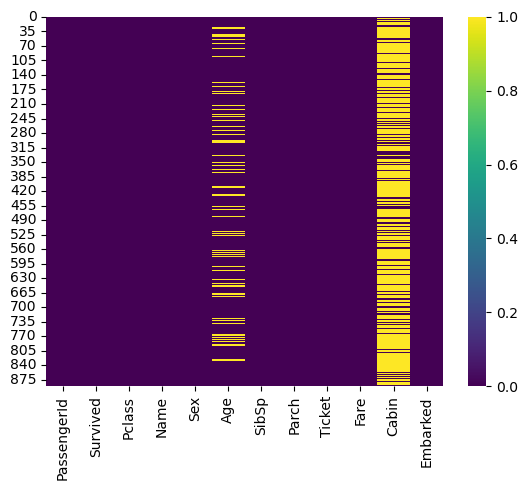

In [177]:
#lets visualise above data using heatmap
sns.heatmap(df.isnull(),cmap='viridis')

# Description

In [178]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dataset contains 891 passengers, Average survival rate is 38.4%,with passengers primarily in the 3rd class (mean Pclass of 2.31). The average age is approximately 29.7 years,with ages ranging from 0.42 to 80 years (177 missing values),The fares paid by passengers varied widely, with a mean fare of 32.20 and a maximum fare of 512.33.

# Handling Missing Values

In [183]:
#fill missing values with median or mean 'Age'(numerical column)
df['Age']=df['Age'].fillna(df['Age'].mean())

In [182]:
#drop the 'cabin' column
df = df.drop(columns=['Cabin'],axis = 1)

In [186]:
#filling missing values with mode(categorical column)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [187]:
#Lets check the changes
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


missing values has been filled 

# Feature Engineering

In [192]:
#Drop Unnecessary Columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [193]:
#Lets check it
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [194]:
#Encoding

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) #one - hot encoded into binary form

In [195]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) #converting 'sex' column into numerical form

In [196]:
#lets check changes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


# Visualization

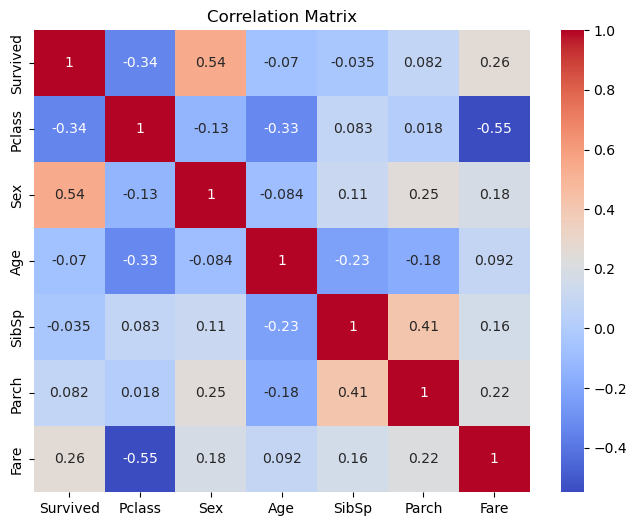

In [197]:
#corr matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that survival is moderately negatively correlated with passenger class (-0.34) and positively with fare (0.26). Passenger class and fare have a strong negative correlation (-0.55). There is a moderate positive correlation between the number of siblings/spouses and parents/children aboard (0.41), as well as between fare and the number of parents/children aboard (0.22). Age is moderately negatively correlated with passenger class (-0.33).Other correlations are weak.


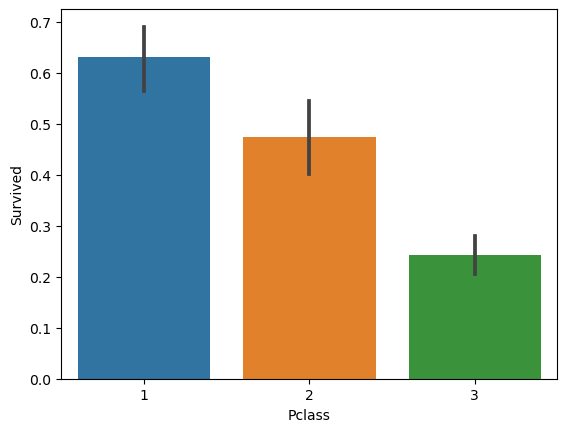

In [198]:
#barplot
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

we can visulize data of  people survived from each class

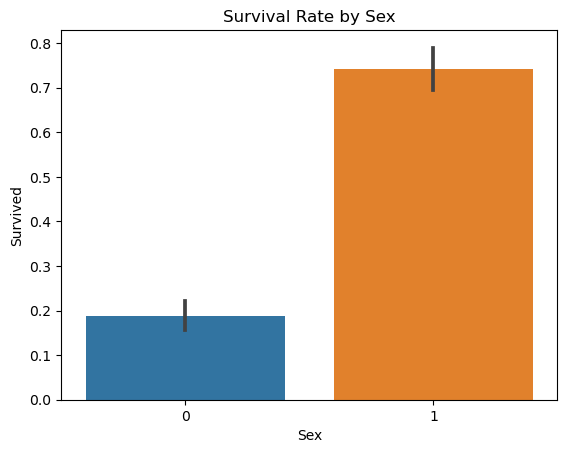

In [199]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

we can see no. of female surviver were much higher than male

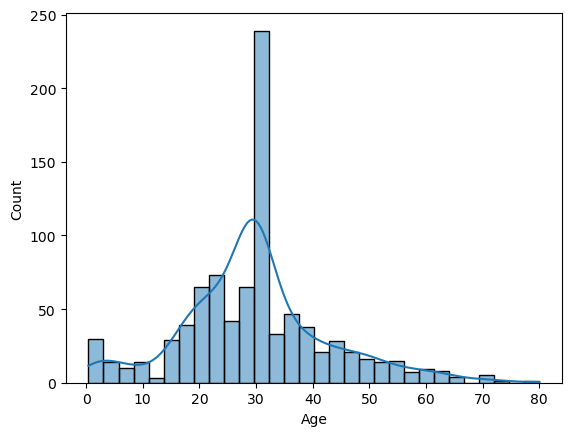

In [202]:
#histplot
sns.histplot(df['Age'], kde=True)
plt.show()

The age distribution is right-skewed, with the majority of passengers being between 20 and 40 years old.

The highest peak occurs around age 30, indicating that this age group had the highest count of passengers.

The blue line represents the Kernel Density Estimate (KDE), which smooths out the distribution to show the probability density of the age variable. The peak in the KDE line also occurs around age 30, confirming that this is the most common age among passengers.

In [203]:
#lets check the no. of passengers survived(count)
survival_counts = df['Survived'].value_counts()

print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


342 survived

# splitting the data for training and testing

In [204]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,False,False
2,3,1,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,True
4,3,0,35.0,0,0,8.0500,False,True


# model traning

In [209]:
#Logistic Regression
logreg = LogisticRegression()#initialize
logreg.fit(X_train, y_train)#train
y_pred_logreg = logreg.predict(X_test)#predict

In [212]:
#Evaluation
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"Precision: {precision_score(y_test, y_pred_logreg)}")
print(f"Recall: {recall_score(y_test, y_pred_logreg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_logreg)}")

Logistic Regression:
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC: 0.8001930501930502


In [216]:
#Decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

In [217]:
# Evaluation
print("\nDecision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dtree)}")
print(f"Precision: {precision_score(y_test, y_pred_dtree)}")
print(f"Recall: {recall_score(y_test, y_pred_dtree)}")
print(f"F1 Score: {f1_score(y_test, y_pred_dtree)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_dtree)}")


Decision Tree:
Accuracy: 0.7877094972067039
Precision: 0.7571428571428571
Recall: 0.7162162162162162
F1 Score: 0.736111111111111
ROC AUC: 0.7771557271557272


In [218]:
#Random Forest
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred_rforest = rforest.predict(X_test)

In [219]:
# Evaluate Random Forest
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rforest)}")
print(f"Precision: {precision_score(y_test, y_pred_rforest)}")
print(f"Recall: {recall_score(y_test, y_pred_rforest)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rforest)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rforest)}")


Random Forest:
Accuracy: 0.8156424581005587
Precision: 0.8059701492537313
Recall: 0.7297297297297297
F1 Score: 0.7659574468085106
ROC AUC: 0.802960102960103


The Random Forest model performs best across most of the key metrics:

Highest Accuracy (0.8156)
Highest Precision (0.8060)
Highest F1 Score (0.7660)
Highest ROC AUC (0.8030)
Logistic Regression has the highest Recall (0.7432), but Random Forest is very close (0.7297).

In [232]:
# Check the first few rows of the test set
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,3,0,29.699118,1,1,15.2458,False,False
439,2,0,31.000000,0,0,10.5000,False,True
840,3,0,20.000000,0,0,7.9250,False,True
720,2,1,6.000000,0,1,33.0000,False,True
39,3,1,14.000000,1,0,11.2417,False,False


In [229]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [233]:
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [234]:
# Evaluate the model
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

In [235]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


# overfitting verification

In [237]:
# Fit the model on the training set
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [238]:
# Predict on the training set
y_train_pred = rforest.predict(X_train)

# Predict on the test set
y_test_pred = rforest.predict(X_test)

In [239]:
# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

In [240]:
print("\nTraining Set Evaluation:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"ROC AUC: {train_roc_auc}")


Training Set Evaluation:
Accuracy: 0.9803370786516854
Precision: 0.9847328244274809
Recall: 0.9626865671641791
F1 Score: 0.9735849056603774
ROC AUC: 0.9768387790775851


In [241]:
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

In [242]:
print("\nTest Set Evaluation:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"ROC AUC: {test_roc_auc}")


Test Set Evaluation:
Accuracy: 0.8156424581005587
Precision: 0.7887323943661971
Recall: 0.7567567567567568
F1 Score: 0.7724137931034482
ROC AUC: 0.806949806949807


# lets cross validate

In [248]:
# Initialize the model
rforest = RandomForestClassifier()

In [249]:
# cross-validation
cv_scores = cross_val_score(rforest, X, y, cv=5, scoring='accuracy')

In [250]:
# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.78212291 0.79213483 0.83707865 0.78651685 0.83146067]
Mean CV Score: 0.8058627832527776


These scores represent the accuracy of the model on different subsets of the data during the cross-validation process.

The model has a good performance with an average accuracy of about 81% across different data splits. This means it works well on new, unseen data and is not just memorizing the training data.

In [251]:
# Fit the model on the full dataset
rforest = RandomForestClassifier()
rforest.fit(X, y)

RandomForestClassifier()

# save the model

In [252]:
# Save the model 
joblib.dump(rforest, 'random_forest_model.pkl')

print("Model saved successfully as 'random_forest_model.pkl'")

Model saved successfully as 'random_forest_model.pkl'
